In [1]:
EDGE_WEIGHT = 30
DATASET_NAME = "small"

In [2]:
# Standard Library
import json

# Third Party Library
import networkx as nx


def load_nx_graph(dataset_path):
    with open(dataset_path) as f:
        graph_data = json.load(f)

    nx_graph = nx.node_link_graph(graph_data)

    return nx_graph


def graph_preprocessing(nx_graph, edge_weight):
    nx_graph = nx.Graph(nx_graph)

    nx_graph = nx_graph.to_undirected()
    nx_graph.remove_edges_from(list(nx.selfloop_edges(nx_graph)))

    largest_cc = max(nx.connected_components(nx_graph), key=len)
    largest_cc_graph = nx_graph.subgraph(largest_cc)

    new_nx_graph = nx.Graph()
    nodes = [str(node_id) for node_id in largest_cc_graph.nodes]
    new_nx_graph.add_nodes_from(nodes)

    for i, edge in enumerate(largest_cc_graph.edges):
        new_nx_graph.add_edge(
            str(edge[0]), str(edge[1]), weight=edge_weight, id=str(i)
        )

    return new_nx_graph

In [3]:
# Standard Library
import os

# Third Party Library
from dotenv import load_dotenv

load_dotenv()

ROOT_PATH = os.environ["ROOT_PATH"]

In [4]:
# Standard Library
from pathlib import Path

root_path = Path(ROOT_PATH)

In [5]:
from egraph import Graph

# dataset_path = root_path.joinpath("data").joinpath(f"small.json")
dataset_path = root_path.joinpath(f"data_c/{DATASET_NAME}.json")
dataset_path = root_path.joinpath('submodules/egraph-rs/js/dataset/1138_bus.json')
nx_graph = load_nx_graph(dataset_path=dataset_path)
# nx_graph = graph_preprocessing(nx_graph=nx_graph, edge_weight=EDGE_WEIGHT)

eg_graph = Graph()
eg_indices = {}
for u in nx_graph.nodes:
    eg_indices[u] = eg_graph.add_node(u)
for u, v in nx_graph.edges:
    eg_graph.add_edge(eg_indices[u], eg_indices[v], (u, v))

In [6]:
from egraph import all_sources_bfs

eg_distancee_matrix = all_sources_bfs(eg_graph, 1)

In [10]:
from egraph import Coordinates, Rng, SparseSgd

eg_drawing = Coordinates.initial_placement(eg_graph)
seed = 0
rng = Rng.seed_from(seed)
sparse_sgd = SparseSgd(
    eg_graph,
    lambda _: EDGE_WEIGHT,
    1000,
    rng,
)
scheduler = sparse_sgd.scheduler(100, 0.01)


def step(eta):
    sparse_sgd.shuffle(rng)
    sparse_sgd.apply(eg_drawing, eta)


scheduler.run(step)

pos = {u: (eg_drawing.x(i), eg_drawing.y(i)) for u, i in eg_indices.items()}

KeyboardInterrupt: 

In [11]:
# from egraph import (
#     Coordinates,
#     StressMajorization,
#     stress,
# )


# drawing = Coordinates.initial_placement(eg_graph)
# s0 = stress(drawing, eg_distancee_matrix)
# stress_majorization = StressMajorization.with_distance_matrix(
#     drawing, eg_distancee_matrix
# )
# stress_majorization.run(drawing)
# s = stress(drawing, eg_distancee_matrix)
# print(f"stress {s0:.2f} -> {s:.2f}")

# pos = {u: (drawing.x(i), drawing.y(i)) for u, i in eg_indices.items()}

In [12]:
# from egraph import KamadaKawai, Coordinates

# eg_drawing = Coordinates.initial_placement(eg_graph)
# kamada_kawai = KamadaKawai(eg_graph, lambda _: 30)
# kamada_kawai.eps = 1e-3
# kamada_kawai.run(eg_drawing)

# pos = {u: (eg_drawing.x(i), eg_drawing.y(i)) for u, i in eg_indices.items()}

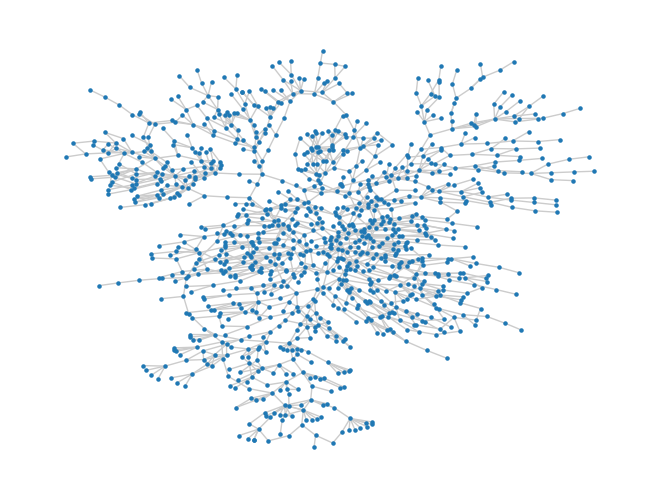

In [13]:
import networkx as nx

nx.draw(G=nx_graph, pos=pos, node_size=5, edge_color="#ccc")

In [14]:
print(pos)

{5: (-99.6256103515625, -129.42706298828125), 1: (-111.04766082763672, -113.51749420166016), 563: (-136.19668579101562, -78.36576080322266), 10: (-139.5135040283203, -100.22620391845703), 2: (-123.24829864501953, -113.81087493896484), 11: (-211.24229431152344, -58.380859375), 3: (-185.23660278320312, -66.93345642089844), 34: (-158.80551147460938, -39.81501007080078), 35: (-174.2943572998047, -76.58549499511719), 104: (-154.39889526367188, -71.22428894042969), 475: (-191.3699493408203, -85.25474548339844), 7: (-333.42608642578125, -150.7484893798828), 4: (-338.2685546875, -181.1255645751953), 27: (-371.8216552734375, -202.2001953125), 101: (-346.02264404296875, -175.79861450195312), 102: (-352.4895935058594, -163.80711364746094), 103: (-312.6399841308594, -151.85415649414062), 9: (-124.18409729003906, -99.53103637695312), 6: (-312.8170471191406, -122.80864715576172), 37: (-353.451416015625, -140.5357208251953), 98: (-273.841552734375, -101.13440704345703), 26: (-168.03866577148438, -104

In [15]:
value = {}
count = {}
max_tier = 0

for node in nx_graph.nodes(data=True):
    data = node[1]
    t = data["tier"]
    v = data["value"]
    if max_tier < t:
        max_tier = t
    if t not in value:
        value[t] = 0
    if t not in count:
        count[t] = 0
    value[t] += v
    count[t] += 1

print(max_tier, value, count)

KeyError: 'tier'

In [ ]:
c = 0
for s, t, d in nx_graph.edges(data=True):
    sn = nx_graph.nodes[s]
    tn = nx_graph.nodes[t]
    if tn["tier"] - sn["tier"] != 1:
        # print(s, t, d, sn, tn)
        c += 1
print(c)

In [20]:
for e in nx_graph.edges(data=True):
    print(e)
    break

(0, 1, {'value': 0.0393136191})


In [21]:
for n in nx_graph.nodes(data=True):
    print(n)
    break

(0, {'tier': 0, 'value': 1.0})


In [33]:
for name in ["extra-large", "insane", "large", "small", "very-large"]:
    dataset_path = root_path.joinpath(f"data_c/{name}.json")
    nx_graph = load_nx_graph(dataset_path=dataset_path)
    # g = nx.Graph()

    # # g.add_nodes_from(nx_graph.nodes)
    # # g.add_edges_from(nx_graph.edges)
    # for s, t, d in nx_graph.edges(data=True):
    #     g.add_edge(s, t, attr=d['value'])
    # for n, d in nx_graph.nodes(data=True):
    #     g.add_node(n, attr=d['value'])
    # nx.write_gexf(g, f'gexf_o/{name}.gexf')
    # # nx.write_gexf(nx_graph, f'gexf/{name}.gexf')
    nx.write_gml(nx_graph, f'graphml/{name}.graphml')

NetworkXError: GraphML writer does not support <class 'NoneType'> as data values.

: 